# **Bibliotecas**

In [11]:
%pip install tensorflow
%pip install matplotlib
%pip install pandas
%pip install numpy
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/96/cf/a714a655266229b51eb2bda117f15275f12457887f165f3c1cc58ab502f1/scikit_learn-1.3.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
    --------------------------------------- 0.1/9.2 MB 2.8 MB/s eta 0:00:04
   - -----------

# **Carregar Dataset**

## LIBRAS

In [ ]:
import os

input_shape = (64, 64, 3)
# input_shape = (75, 75, 3)  # InceptionV3 input size

train_path = f"../datasets/libras/{input_shape[0]}x{input_shape[1]}/train/"
test_path  = f"../datasets/libras/{input_shape[0]}x{input_shape[1]}/test/"

classes = os.listdir(train_path)
classes = sorted(classes)
n_classes = len(classes)
print(f"Classes: {classes}")

file_count = []

for fld in os.listdir(train_path):
    crt = os.path.join(train_path, fld)
    image_count = len(os.listdir(crt))
    file_count.append(image_count)
    print(f'{crt} contains {image_count} images')

print(f'\nTotal number of images: {sum(file_count)}')

## Pessoal

In [15]:
import os

input_shape = (64, 64, 3)
# input_shape = (75, 75, 3)  # InceptionV3 input size

train_path = f"../datasets/personal/clean/{input_shape[0]}x{input_shape[1]}/train/"
test_path  = f"../datasets/personal/clean/{input_shape[0]}x{input_shape[1]}/test/"

classes = os.listdir(train_path)
classes = sorted(classes)
n_classes = len(classes)
print(f"Classes: {classes}")

file_count = []

for fld in os.listdir(train_path):
    crt = os.path.join(train_path, fld)
    image_count = len(os.listdir(crt))
    file_count.append(image_count)
    print(f'{crt} contains {image_count} images')

print(f'\nTotal number of images: {sum(file_count)}')

Classes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y']
../datasets/personal/clean/64x64/train/A contains 150 images
../datasets/personal/clean/64x64/train/B contains 150 images
../datasets/personal/clean/64x64/train/C contains 150 images
../datasets/personal/clean/64x64/train/D contains 150 images
../datasets/personal/clean/64x64/train/E contains 150 images
../datasets/personal/clean/64x64/train/F contains 150 images
../datasets/personal/clean/64x64/train/G contains 150 images
../datasets/personal/clean/64x64/train/I contains 150 images
../datasets/personal/clean/64x64/train/L contains 150 images
../datasets/personal/clean/64x64/train/M contains 150 images
../datasets/personal/clean/64x64/train/N contains 150 images
../datasets/personal/clean/64x64/train/O contains 150 images
../datasets/personal/clean/64x64/train/P contains 150 images
../datasets/personal/clean/64x64/train/Q contains 150 images
../datasets/personal/clean/64x6

# **Carregar modelo**

## InceptionV3

In [ ]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input
from keras.models import load_model

# Define channel place
keras.backend.set_image_data_format('channels_last')

## Define constants
BATCH_SIZE = 32
SEED = 123

## Data augmentation and preprocessing
# Validation Gen
val_data_generator = ImageDataGenerator(
    validation_split=0.2,
    preprocessing_function=preprocess_input,
)

validation_generator = val_data_generator.flow_from_directory(
    train_path,
    target_size=input_shape[:2],
    shuffle=False,
    seed=SEED,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    subset="validation"
)

# Test Gen
test_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)
test_generator = test_generator.flow_from_directory(
    test_path,
    target_size=input_shape[:2],
    shuffle=False,
    seed=SEED,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
)

## Image quantity
validation_samples = validation_generator.samples
test_samples = test_generator.samples

## Model
model = load_model("./InceptionV3/libras/inception_v3_model.h5")
# model = load_model("./InceptionV3/personal/inception_v3_model.h5")

## ResNet50

In [16]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input
from keras.models import load_model

# Define channel place
keras.backend.set_image_data_format('channels_last')

## Define constants
BATCH_SIZE = 32
SEED = 123

## Data augmentation and preprocessing
# Validation Gen
val_data_generator = ImageDataGenerator(
    validation_split=0.2,
    preprocessing_function=preprocess_input,
    rescale=1./255,
)

validation_generator = val_data_generator.flow_from_directory(
    train_path,
    target_size=input_shape[:2],
    shuffle=False,
    seed=SEED,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    subset="validation"
)

# Test Gen
test_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rescale=1./255,
)
test_generator = test_generator.flow_from_directory(
    train_path,
    target_size=input_shape[:2],
    shuffle=False,
    seed=SEED,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
)

## Image quantity
validation_samples = validation_generator.samples
test_samples = test_generator.samples

## Model
model = load_model("./ResNet50/libras/resnet50_model.h5")
# model = load_model("./InceptionV3/personal/resnet50_model.h5")

Found 600 images belonging to 21 classes.
Found 3000 images belonging to 21 classes.


# **Testes**

## Funções

In [5]:
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def classification_report_csv(report):
  report_data = []
  lines = report.split('\n')
  for line in lines[2:-3]:
      row = {}
      row_data = [d for d in line.split(' ') if d!='']
      if (len(row_data) == 5):
        row['class'] = row_data[0]
        row['precision'] = float(row_data[1])
        row['recall'] = float(row_data[2])
        row['f1_score'] = float(row_data[3])
        row['support'] = float(row_data[4])
        report_data.append(row)
  dataframe = pd.DataFrame.from_dict(report_data)
  # dataframe.to_csv(f'{filepath}classification_report.csv', index = False)

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # plt.savefig(f'{filepath}confusion_matrix.png')

## Reports

19/19 [==============================] - 3s 161ms/step - loss: 2.7771 - accuracy: 0.5583
Validation loss: 2.7770779132843018
Validation accuracy: 0.5583333373069763
94/94 [==============================] - 15s 161ms/step - loss: 2.6342 - accuracy: 0.5900
Test loss: 2.634226083755493
Test accuracy: 0.5899999737739563
94/94 [==============================] - 15s 159ms/step
Classification Report
              precision    recall  f1-score   support

           A       0.37      0.99      0.54       150
           B       1.00      0.92      0.96       150
           C       0.86      0.96      0.91       150
           D       0.27      0.99      0.43       150
           E       0.00      0.00      0.00       150
           F       0.52      0.07      0.13       150
           G       1.00      0.04      0.08       150
           I       0.00      0.00      0.00       150
           L       1.00      0.22      0.36       150
           M       0.78      0.83      0.80       150
         

c:\Users\Ricardo\Documents\GitHub\Pessoal\TCC\python-tcc\training\.venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ricardo\Documents\GitHub\Pessoal\TCC\python-tcc\training\.venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ricardo\Documents\GitHub\Pessoal\TCC\python-tcc\training\.venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this beh

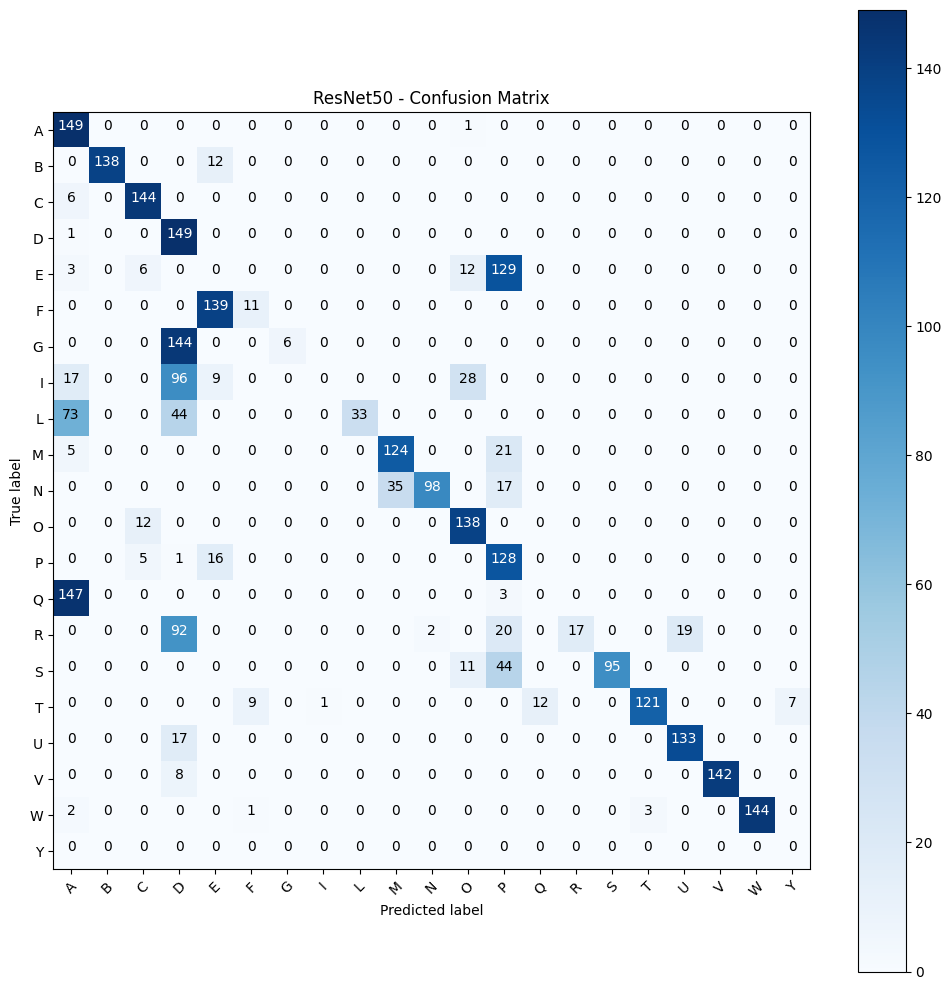

In [18]:
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

## Validation
score = model.evaluate(validation_generator)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

# Test
score = model.evaluate(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

## Some reports
# On test dataset
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

# Confution Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='ResNet50 - Confusion Matrix')

# Classification Report
print('Classification Report')
report = classification_report(test_generator.classes, y_pred, target_names=target_names)
classification_report_csv(report)
print(report)